**Build an Image Classifier With SVM**

In [3]:
!unzip '/content/drive/MyDrive/C&D.zip' -d '/content/drive/MyDrive/C&D_Unzip'

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/C&D_Unzip/dog vs cat/dataset/training_set/cats/cat.37.jpg  
  inflating: /content/drive/MyDrive/C&D_Unzip/dog vs cat/dataset/training_set/cats/cat.370.jpg  
  inflating: /content/drive/MyDrive/C&D_Unzip/dog vs cat/dataset/training_set/cats/cat.3700.jpg  
  inflating: /content/drive/MyDrive/C&D_Unzip/dog vs cat/dataset/training_set/cats/cat.3701.jpg  
  inflating: /content/drive/MyDrive/C&D_Unzip/dog vs cat/dataset/training_set/cats/cat.3702.jpg  
  inflating: /content/drive/MyDrive/C&D_Unzip/dog vs cat/dataset/training_set/cats/cat.3703.jpg  
  inflating: /content/drive/MyDrive/C&D_Unzip/dog vs cat/dataset/training_set/cats/cat.3704.jpg  
  inflating: /content/drive/MyDrive/C&D_Unzip/dog vs cat/dataset/training_set/cats/cat.3705.jpg  
  inflating: /content/drive/MyDrive/C&D_Unzip/dog vs cat/dataset/training_set/cats/cat.3706.jpg  
  inflating: /content/drive/MyDrive/C&D_Unzip/dog vs cat/dataset/train

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
train_dir = "/content/drive/MyDrive/C&D_Unzip/dog vs cat/dataset/training_set"
test_df = "/content/drive/MyDrive/C&D_Unzip/dog vs cat/dataset/test_set" 
os.listdir(train_dir)

['cats', 'dogs']

In [8]:
train_datagen = ImageDataGenerator(rescale=(1/255.),shear_range = 0.2,zoom_range=0.2,
                                   horizontal_flip=True)
training_set = train_datagen.flow_from_directory(directory = train_dir,target_size=(64,64),
                                                batch_size=32,
                                                class_mode = "binary")
test_datagen = ImageDataGenerator(rescale=(1/255.))
test_set = test_datagen.flow_from_directory(directory = test_df,target_size=(64,64),
                                                batch_size=32,
                                                class_mode = "binary")

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [14]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,Dense,MaxPool2D,Flatten
from tensorflow.keras.regularizers import l2
from keras.utils.vis_utils import plot_model

In [15]:
model = Sequential()
model.add(Conv2D(filters = 32, padding = "same",activation = "relu",kernel_size=3, strides = 2,input_shape=(64,64,3)))
model.add(MaxPool2D(pool_size=(2,2),strides = 2))

model.add(Conv2D(filters = 32, padding = "same",activation = "relu",kernel_size=3))
model.add(MaxPool2D(pool_size=(2,2),strides = 2))

model.add(Flatten())
model.add(Dense(128,activation="relu"))

#Output layer
model.add(Dense(1,kernel_regularizer=l2(0.01),activation = "linear"))
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

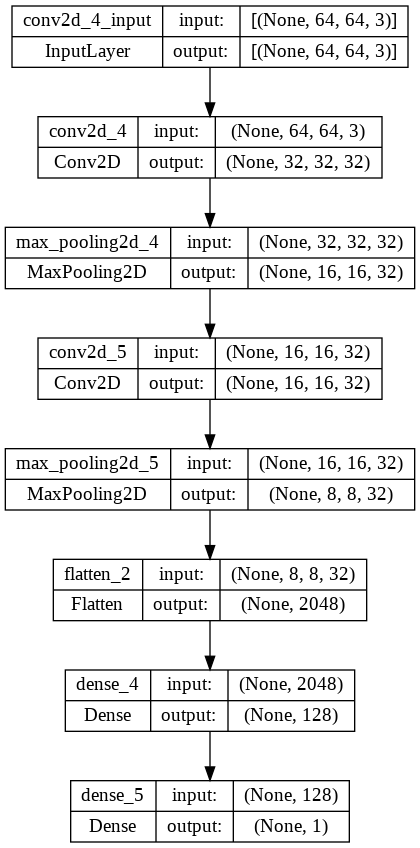

In [17]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [19]:
model.compile(optimizer = 'adam', loss = "hinge", metrics = ['accuracy'])
history = model.fit(x = training_set,validation_data = test_set,epochs=15)

Epoch 1/15
250/250 [==============================] - 62s 244ms/step - loss: 0.4626 - accuracy: 0.7908 - val_loss: 0.5359 - val_accuracy: 0.7935
Epoch 2/15
250/250 [==============================] - 59s 235ms/step - loss: 0.4477 - accuracy: 0.7966 - val_loss: 0.4856 - val_accuracy: 0.7865
Epoch 3/15
250/250 [==============================] - 58s 233ms/step - loss: 0.4376 - accuracy: 0.8043 - val_loss: 0.4704 - val_accuracy: 0.7945
Epoch 4/15
250/250 [==============================] - 59s 236ms/step - loss: 0.4324 - accuracy: 0.8015 - val_loss: 0.5007 - val_accuracy: 0.8020
Epoch 5/15
250/250 [==============================] - 58s 234ms/step - loss: 0.4155 - accuracy: 0.8148 - val_loss: 0.5161 - val_accuracy: 0.8040
Epoch 6/15
250/250 [==============================] - 59s 234ms/step - loss: 0.4176 - accuracy: 0.8131 - val_loss: 0.4630 - val_accuracy: 0.7945
Epoch 7/15
250/250 [==============================] - 62s 248ms/step - loss: 0.4114 - accuracy: 0.8188 - val_loss: 0.4691 - val_ac